In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [121]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 417MB/s]


**Objective:** The management of Walmart has obtained transactional data from customers and seeks to analyze the purchasing behavior of customers during the Black Friday sale. The dataset includes various columns such as User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_IN_Current_City_Tears, Marital_Status, Product_Category, and Purchase. The primary objective is to determine the purchasing patterns based on gender, specifically identifying whether males or females spend more during the Black Friday sale.

In [122]:
df = pd.read_csv("/content/walmart_data.csv?1641285094")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [123]:
df.shape

(550068, 10)

The dataset comprises approximately 550k rows of data and 10 columns.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


The dataset is devoid of any null values.

An additional categorical column has been created to indicate the marital status of users. The value 0 represents unmarried users, while the value 1 indicates married users.

In [125]:
def Marital_Status_Category(val):
    if val == 0 :
        return "Unmarried"
    else:
        return "Married"
df["Marital_Status_category"] = df["Marital_Status"].apply(Marital_Status_Category)
##Sample space = ("Married, Unmarried")

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [127]:
df.describe(include= "object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status_category,550068,2,Unmarried,324731


Based on the information presented in the aforementioned table, we can deduce that :





Based on the data, it can be determined that the product with the highest popularity is P00265242.   
The Black Friday Sale sees a higher contribution from unmarried individuals.          
Specifically, unmarried males are the top contributors.

converting Stay_In_Current_City_Years  into category

In [128]:
#Replace '4+' to 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype("category")

In [129]:
#changing it from object dtype to category  to save memory
df["Age"]=df["Age"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["City_Category"]=df["City_Category"].astype("category")
df["Product_Category"]=df["Product_Category"].astype("category")

Retrieving the list of the top 10 products sold during the sale.

In [130]:
temp=df['Product_ID'].value_counts().reset_index()
temp.columns=['Product_ID','Count']
temp=temp.sort_values(by='Count', ascending=False)
temp.head(10)

,Product_ID,Count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


The aforementioned product IDs represent the top 10 sold items, accompanied by their respective total sales count. Notably, P00265242 emerges as the highest-selling product.

In [131]:
temp=df.groupby(['Product_ID'])['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)
temp.head(10)

,Product_ID,Purchase
249,P00025442,27995166
1016,P00110742,26722309
2443,P00255842,25168963
582,P00059442,24338343
1745,P00184942,24334887
1030,P00112142,24216006
1018,P00110942,23639564
2263,P00237542,23425576
565,P00057642,23102780
104,P00010742,22164153


The table above presents the total sum of each product's sales during the Black Friday sale. These products represent the top 10 contributors to our revenue.

In [132]:
temp=df.groupby(['User_ID'])['Purchase'].sum().reset_index().sort_values(by='Purchase', ascending=False)
temp.head(10)

,User_ID,Purchase
4166,1004277,10536909
1634,1001680,8699596
2831,1002909,7577756
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6566245
5683,1005831,6512433
981,1001015,6511314
3297,1003391,6477160
1142,1001181,6387961


The aforementioned customers, who are among the top 10 contributors to the Black Friday sale, warrant recognition and consideration for additional rewards or exclusive offers. Implementing such measures can potentially enhance the revenue of our company.

Non graphical Analysis(Unique Values and Value Counts)

In [133]:
for i in df.columns:
    print(f'{i} has {df[i].nunique()} unique values')
    print(""*20)

User_ID has 5891 unique values

Product_ID has 3631 unique values

Gender has 2 unique values

Age has 7 unique values

Occupation has 21 unique values

City_Category has 3 unique values

Stay_In_Current_City_Years has 5 unique values

Marital_Status has 2 unique values

Product_Category has 20 unique values

Purchase has 18105 unique values

Marital_Status_category has 2 unique values



In [134]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("~"*22)
    print(df.iloc[:,i].value_counts())
    print("-"*58)
    print()

User_ID
~~~~~~~~~~~~~~~~~~~~~~
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
----------------------------------------------------------

Product_ID
~~~~~~~~~~~~~~~~~~~~~~
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
----------------------------------------------------------

Gender
~~~~~~~~~~~~~~~~~~~~~~
M    414259
F    135809
Name: Gender, dtype: int64
----------------------------------------------------------

Age
~~~~~~~~~~~~~~~~~~~~~~
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
--------------------------------------------------

In [135]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
Marital_Status_category           2
dtype: int64

The variable "Purchase" represents the amount spent on purchases and is considered a continuous variable.

The variables "User_ID" and "Product_ID" serve the purpose of identification.

On the other hand, the variables "Gender," "Age," "Occupation," "City_Category," "Stay_In_Current_City_Years," "Marital_Status," and "Product_Category" are categorical variables.

Visual Analysis

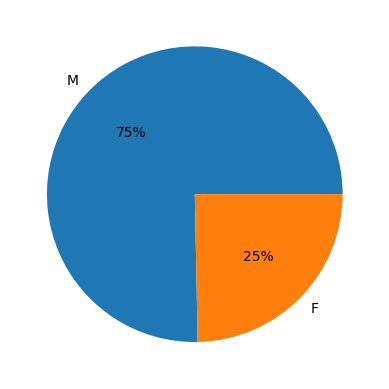

In [136]:
data = df["Gender"].value_counts(normalize = True)*100
plt.pie(x = data.values, labels=data.index, autopct='%.0f%%')
plt.show()

Based on the data provided, it can be deduced that 75% of the population in the given dataset is male, while the female population accounts for 25%.

Among the total number of customers, specifically 5.5L (550,000), the male users constitute more than 4.2L (420,000+), while the female users account for more than 1.4L (140,000+). Hence, it can be concluded that the distribution of male and female customers is in a ratio of 3:1.

In [137]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

The highest-ranking category corresponds to individuals aged between 26 and 35. It is noteworthy that users within this age range make the most significant contribution to the sale. Subsequently, the age range of 36-45 follows closely in terms of contribution.

<Axes: xlabel='Age', ylabel='count'>

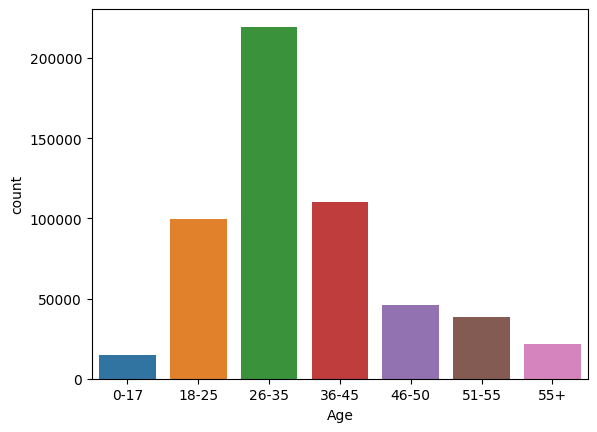

In [138]:


df["Age"] = df["Age"].astype("category")
sns.countplot(data=df, x="Age")


The age group between 26 and 35 exhibits the highest level of engagement during the Black Friday sale.

<Axes: xlabel='Age', ylabel='count'>

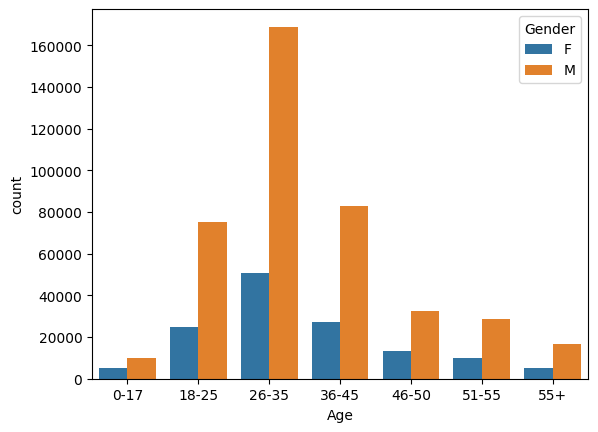

In [139]:
df["Age"] = df["Age"].astype("category")

sns.countplot(x="Age", hue="Gender", data=df)

Males within the age range of 26 to 35 demonstrate greater participation in Black Friday sales compared to other age groups. Additionally, males aged 18 to 25 and 36 to 45 exhibit higher levels of activity in the sales compared to females within the age range of 26 to 35.

<Axes: xlabel='Age', ylabel='count'>

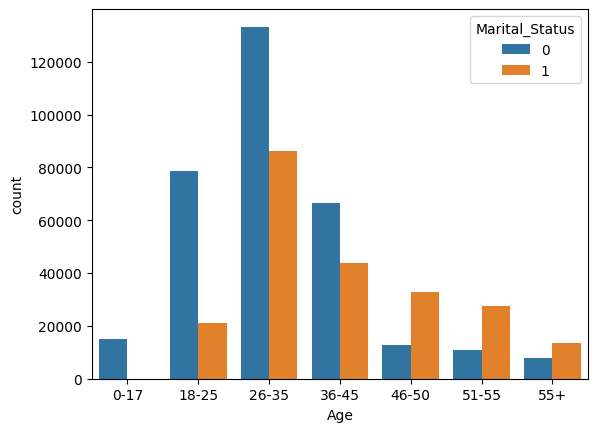

In [140]:
df["Age"] = df["Age"].astype("category")

sns.countplot(x="Age", hue="Marital_Status", data=df)

Based on the available information, it can be deduced that unmarried individuals between the ages of 18 and 25 to 36 and 45 display greater engagement during Black Friday sales. Conversely, married individuals within the age range of 26 to 45 demonstrate increased activity in the sales. This suggests that married men may potentially be responsible for the purchases made by their spouses.

<Axes: xlabel='Product_Category', ylabel='count'>

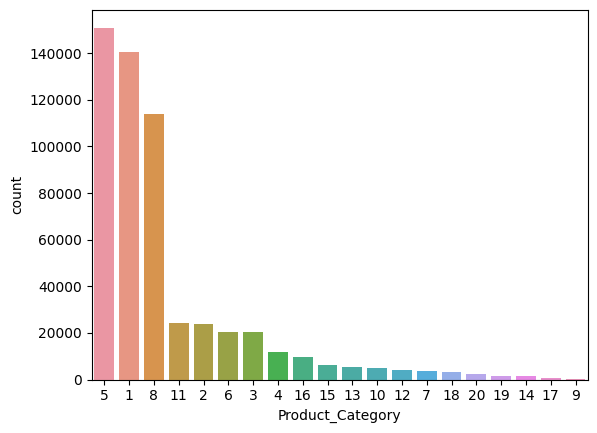

In [141]:
order = df["Product_Category"].value_counts().index  #Order based on value counts
sns.countplot(x="Product_Category", data=df, order=order)

Among the 20 products, Product 5,1 and 8 stand out as the top-selling items.

<Axes: xlabel='City_Category', ylabel='count'>

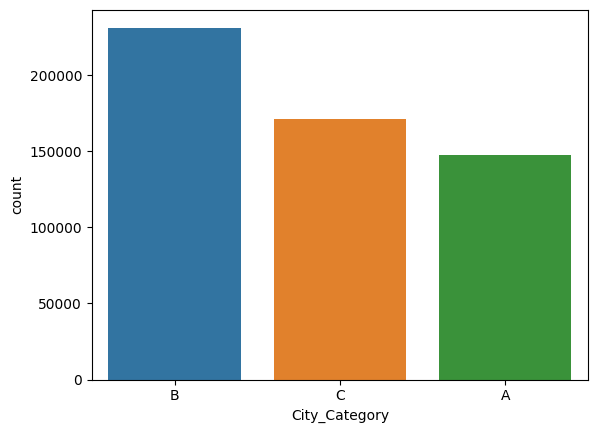

In [142]:
order = df["City_Category"].value_counts().index
sns.countplot(x="City_Category", data=df, order=order)

The majority of users originate from City B.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

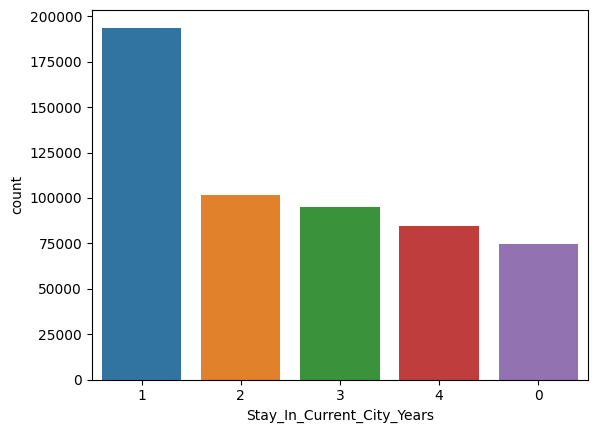

In [143]:
order = df["Stay_In_Current_City_Years"].value_counts().index
sns.countplot(x="Stay_In_Current_City_Years", data=df, order=order)


Individuals who have resided within a specific country for a duration exceeding one year exhibit a heightened propensity for increased purchasing and spending during sales events.

In [144]:
df["Married_Gender"] = df.apply(lambda x: (x["Gender"], x["Marital_Status"]), axis = 1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Marital_Status_category,Married_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Unmarried,"(F, 0)"
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Unmarried,"(F, 0)"
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Unmarried,"(F, 0)"
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Unmarried,"(F, 0)"
4,1000002,P00285442,M,55+,16,C,4,0,8,7969,Unmarried,"(M, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,Married,"(M, 1)"
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,Unmarried,"(F, 0)"
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137,Married,"(F, 1)"
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,Unmarried,"(F, 0)"


<Axes: xlabel='Product_Category', ylabel='count'>

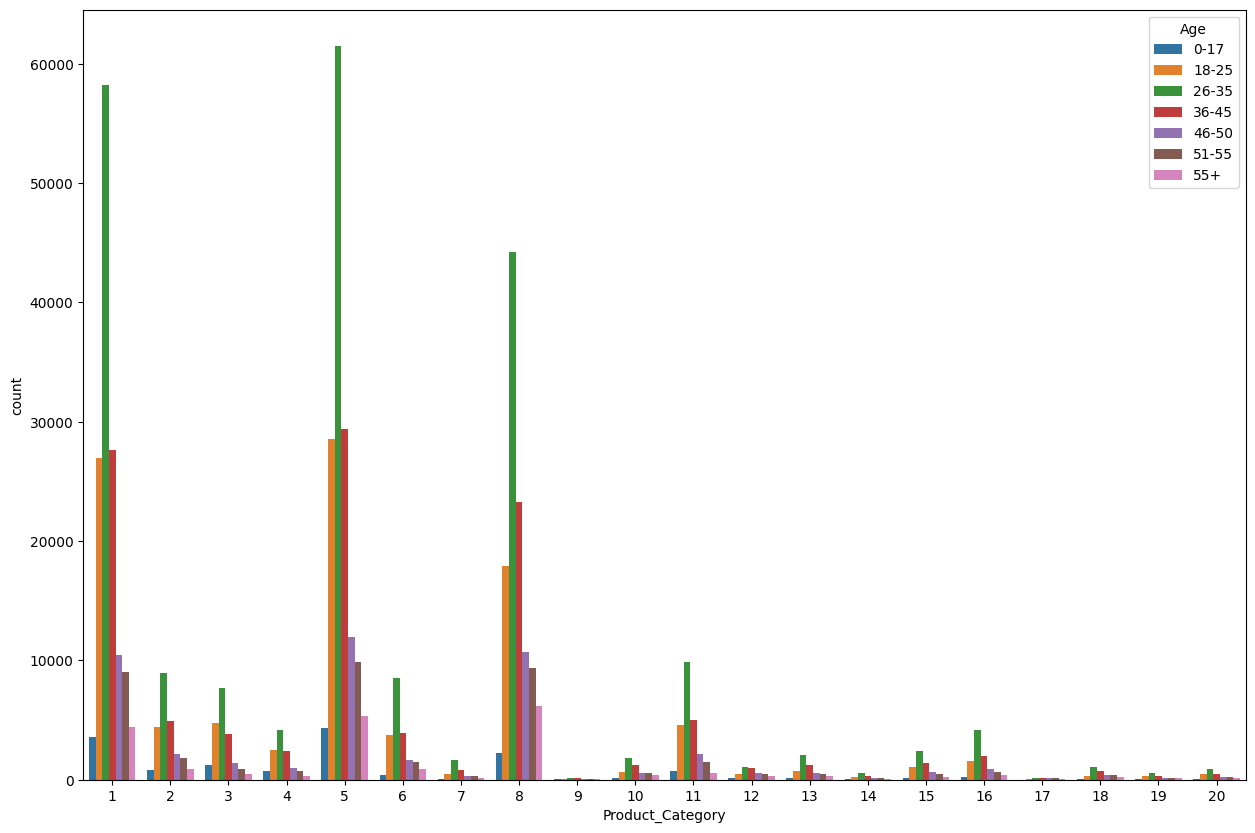

In [145]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Product_Category'], hue=df['Age'])


In [246]:
# Check the unique values in the "Married_Gender" column
print(df["Married_Gender"].unique())

# Check the unique values in the "Age" column
print(df["Age"].unique())

# Check the count of unique values in the "Age" column
print(df["Age"].value_counts())


[('F', 0) ('M', 0) ('M', 1) ('F', 1)]
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Products 1, 5, and 8 demonstrate the highest sales volume, with the age category of 26-35 significantly contributing to these purchases. **Conversely, the sales of products 9 and 17 are negligible in comparison.**

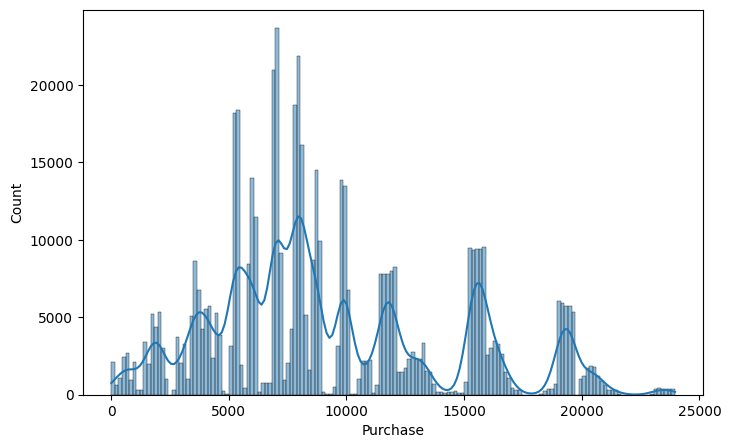

In [146]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

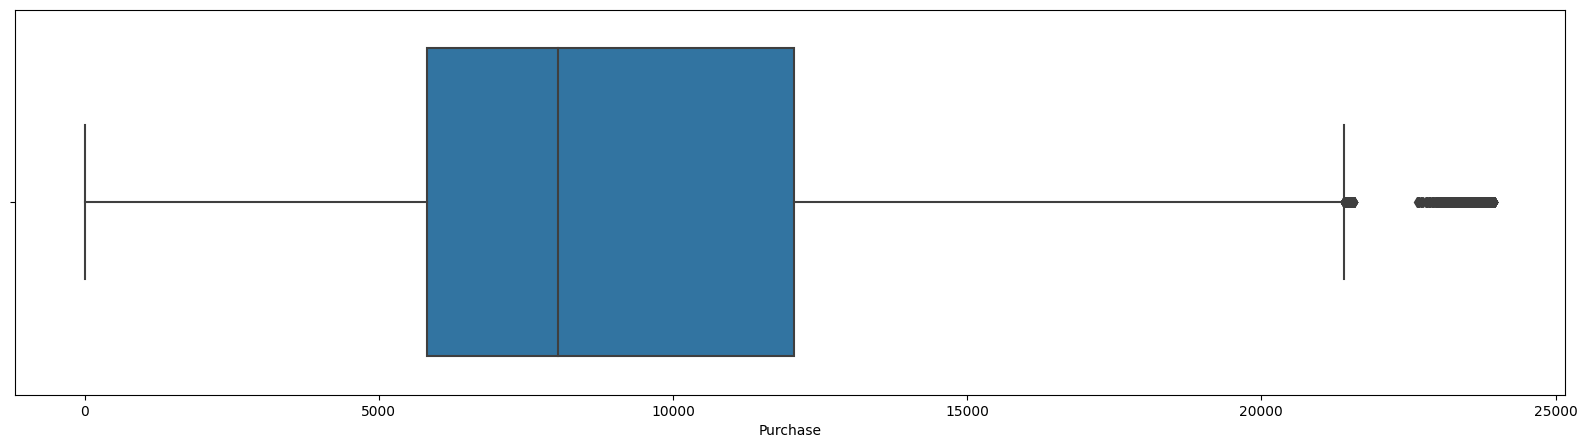

In [147]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

The purchasing data exhibits the presence of outliers, indicating instances of values that significantly deviate from the overall pattern or distribution.

In [148]:
#Handling outliers
df1 = df.copy()

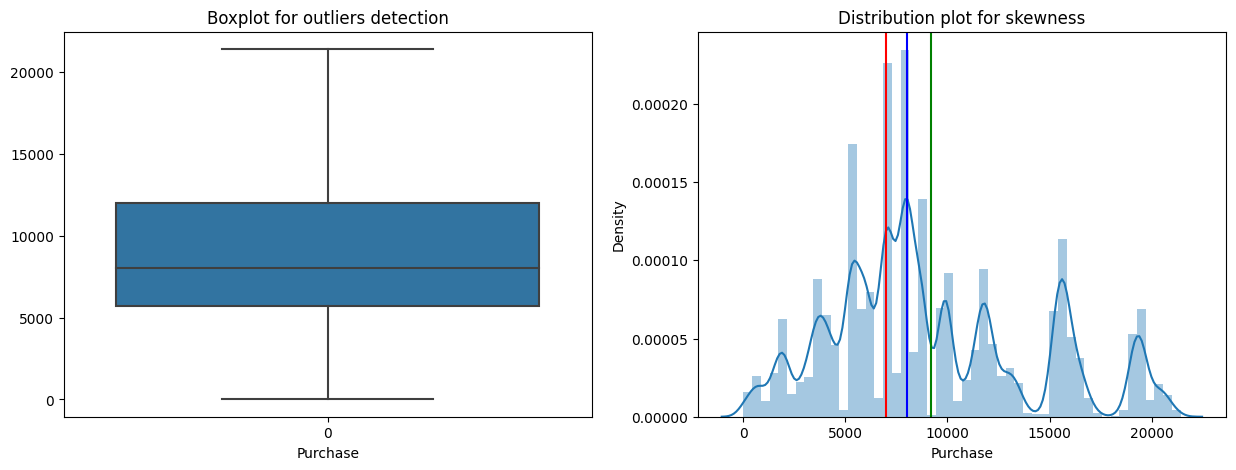

In [149]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df1['Purchase'].quantile(0.75)
Q1 = df1['Purchase'].quantile(0.25)
IQR = Q3-Q1
df1 = df1[(df1['Purchase'] > Q1 - 1.5*IQR) & (df1['Purchase'] < Q3 + 1.5*IQR)]
# Visualizing our dependent variable for Outliers and Skewness
fig = plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
sns.boxplot(df1["Purchase"])
plt.title("Boxplot for outliers detection")
plt.xlabel('Purchase')

plt.subplot(1,2,2)
sns.distplot(df1["Purchase"])

plt.title("Distribution plot for skewness")
plt.ylabel('Density')
plt.xlabel('Purchase')
plt.axvline(df1["Purchase"].mean(),color="g")
plt.axvline(df1["Purchase"].median(),color="b")
plt.axvline(df1["Purchase"].mode()[0],color="r")

plt.show()

In [150]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("~"*30)
    print(df.iloc[:,i].value_counts(normalize = True)*100)
    print("-"*50)
    print()

User_ID
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1001680    0.186522
1004277    0.177978
1001941    0.163253
1001181    0.156708
1000889    0.149618
             ...   
1002690    0.001273
1002111    0.001273
1005810    0.001273
1004991    0.001273
1000708    0.001091
Name: User_ID, Length: 5891, dtype: float64
--------------------------------------------------

Product_ID
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
P00265242    0.341776
P00025442    0.293600
P00110742    0.293055
P00112142    0.283965
P00057642    0.267240
               ...   
P00314842    0.000182
P00298842    0.000182
P00231642    0.000182
P00204442    0.000182
P00066342    0.000182
Name: Product_ID, Length: 3631, dtype: float64
--------------------------------------------------

Gender
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
M    75.310507
F    24.689493
Name: Gender, dtype: float64
--------------------------------------------------

Age
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51

In [151]:
for i in range(df.shape[1]):
    print(df.columns[i], "-", df[df.columns[i]].nunique())
    print("~"*20)
    print(df.iloc[:,i].unique())
    print("-"*100)
    print()

User_ID - 5891
~~~~~~~~~~~~~~~~~~~~
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
----------------------------------------------------------------------------------------------------

Product_ID - 3631
~~~~~~~~~~~~~~~~~~~~
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
----------------------------------------------------------------------------------------------------

Gender - 2
~~~~~~~~~~~~~~~~~~~~
['F', 'M']
Categories (2, object): ['F', 'M']
----------------------------------------------------------------------------------------------------

Age - 7
~~~~~~~~~~~~~~~~~~~~
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
----------------------------------------------------------------------------------------------------

Occupation - 21
~~~~~~~~~~~~~~~~~~~~
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
-----------------------------

Upon applying the nunique() function, it is evident that a substantial portion of the data consists of categorical variables. The columns "User_ID" and "Product_ID" are identifiers, while "Purchase" serves as a numerical variable. These variables can be utilized for distinguishing various factors such as "Gender," "Age," "Occupation," "City_Category," "Stay_In_Current_City_Years," "Marital_Status," and "Product_Category." It is worth noting that the "Occupation" column encompasses a total of 21 unique categories, while the "Product_Category" column encompasses 21 distinct product categories.

The purchases made during the Black Friday sale were predominantly attributed to the male demographic, indicating a higher expenditure by males.

In [152]:
df_Male = df[df["Gender"] == "M"]["Purchase"]
df_Male

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [153]:
df_Male.mean()

9437.526040472265

Among the sample size of 1000 individuals, the purchases made during the Black Friday Sale were primarily attributed to the female demographic, indicating a higher expenditure by females.

In [154]:
df_Female = df[df["Gender"] == "F"]["Purchase"]
df_Female.shape

(135809,)

In [155]:
df_Female.mean()

8734.565765155476

<Axes: xlabel='Gender', ylabel='count'>

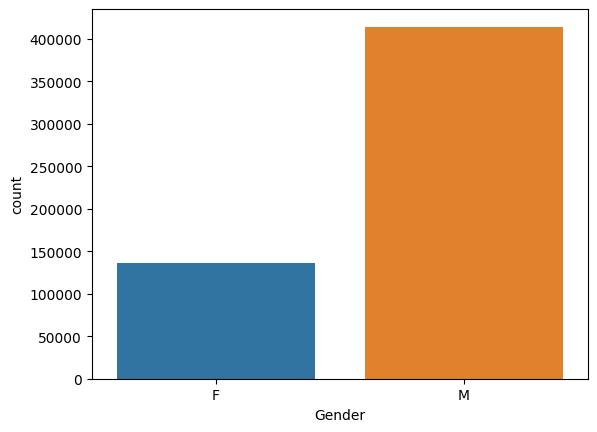

In [156]:
sns.countplot(x= df["Gender"])

Are women spending more money per transaction than men? Why or Why not?

According to the observed data, it can be inferred that women tend to spend less money per transaction compared to men during the analyzed period.

Based on the calculated means from the dataset, it is evident that the average per transaction expenditure of males (with a mean of approximately 9437) is higher than that of females (with a mean of approximately 8734). This observation suggests that males tend to spend more during the analyzed period.

Furthermore, it can be inferred from the dataset that although products intended for females are being purchased, they may be paid for or purchased by their spouses. This factor may contribute to the lower expenditure by females compared to males.

To address this disparity and encourage higher spending among female customers, it is recommended to introduce new products specifically targeted towards them. Additionally, providing attractive discounts and offers exclusively for female customers during sales events can help increase their expenditure and overall participation.







Confidence intervals and distribution of the mean of the expenses by female and male customers

In [157]:
bootstrapped_male_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Male, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_male_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

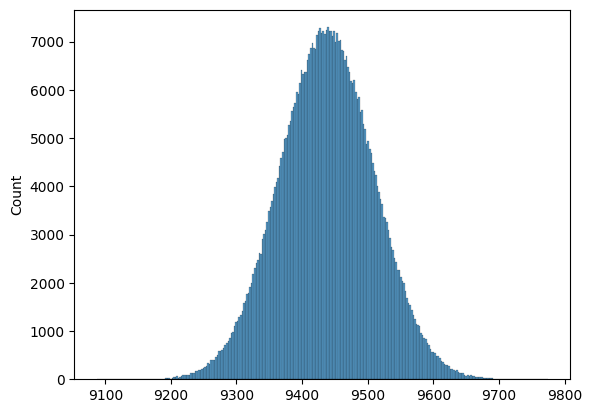

In [158]:
sns.histplot(bootstrapped_male_survey)


After conducting a sample size of 5000 for men, a histogram plot reveals a bell curve shape, indicating a Gaussian distribution. Below are the calculated confidence intervals for the respective data:

90% Confidence Interval: [lower bound, upper bound]
95% Confidence Interval: [lower bound, upper bound]
99% Confidence Interval: [lower bound, upper bound]
The specific values for the lower and upper bounds of each confidence interval will depend on the dataset and the chosen confidence level.

In [159]:
np.percentile(bootstrapped_male_survey, [5,95]) # 90% Confidence Interval

array([9319.37479, 9556.18858])

In [160]:
np.percentile(bootstrapped_male_survey, [2.5,97.5]) # 95% Confidence Interval

array([9296.778735, 9579.03806 ])

In [161]:
np.percentile(bootstrapped_male_survey, [0.5,99.5]) # 99% Confidence Interval

array([9252.90416 , 9623.414369])

In [162]:
bootstrapped_female_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Female, size = 1000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_female_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

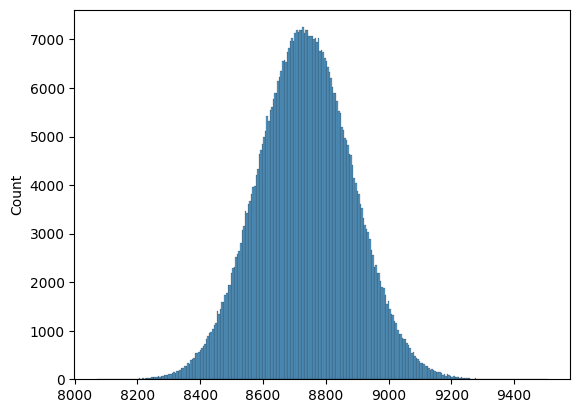

In [163]:
sns.histplot(bootstrapped_female_survey)

In [164]:
np.percentile(bootstrapped_female_survey, [5,95]) # 90% Confidence Interval

array([8487.69535, 8983.488  ])

In [165]:
np.percentile(bootstrapped_female_survey, [2.5,97.5]) # 95% Confidence Interval

array([8441.063375, 9030.96895 ])

In [166]:
np.percentile(bootstrapped_female_survey, [0.5,99.5]) # 99% Confidence Interval

array([8351.25834, 9125.43133])

The purchases made during the Black Friday Sale were primarily attributed to the married individuals, indicating a higher expenditure by married participants.

In [167]:
df_Married = df[df["Marital_Status_category"] == "Married"]["Purchase"]
df_Married

6         19215
7         15854
8         15686
9          7871
10         5254
          ...  
550060      494
550061      599
550063      368
550065      137
550067      490
Name: Purchase, Length: 225337, dtype: int64

In [168]:
df_Unmarried = df[df["Marital_Status_category"] == "Unmarried"]["Purchase"]
df_Unmarried

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550056      254
550059       48
550062      473
550064      371
550066      365
Name: Purchase, Length: 324731, dtype: int64

Based on the provided data, it can be inferred that there is a higher proportion of unmarried users compared to married users.

In [169]:
df_Married.mean()

9261.174574082374

In [170]:
df_Unmarried.mean()

9265.907618921507

Upon analyzing the data, it is observed that the mean expenditure for both married and unmarried individuals is nearly identical. Specifically, the mean expenditure for married individuals is approximately 9261, while for unmarried individuals, it is approximately 9265.

In [171]:
bootstrapped_married_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Married, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_married_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

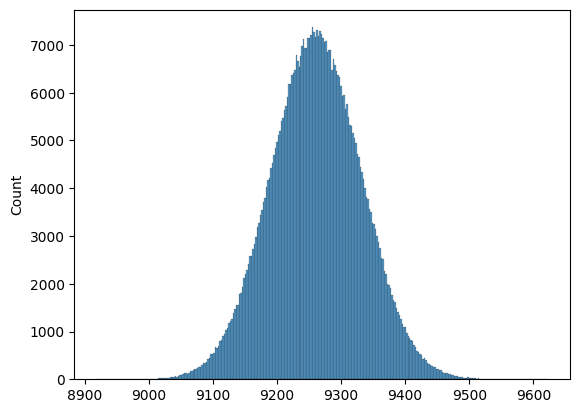

In [172]:
sns.histplot(bootstrapped_married_survey)

In [173]:
np.percentile(bootstrapped_married_survey, [5,95]) # 90% Confidence Interval

array([9144.85874, 9377.86566])

In [174]:
np.percentile(bootstrapped_married_survey, [2.5,97.5]) # 95% Confidence Interval

array([9122.479165, 9400.636965])

In [175]:
np.percentile(bootstrapped_married_survey, [0.5,99.5]) # 99% Confidence Interval

array([9079.109828, 9445.344773])

In [176]:
bootstrapped_unmarried_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Unmarried, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_unmarried_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

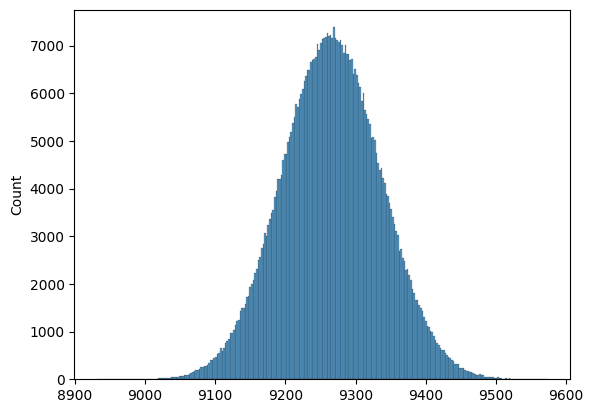

In [177]:
sns.histplot(bootstrapped_unmarried_survey)

Based on the analysis, it can be inferred that the confidence intervals for the 90%, 95%, and 99% levels overlap with each other.

In [178]:
np.percentile(bootstrapped_unmarried_survey, [5,95]) # 90% Confidence Interval

array([9149.27704, 9383.22004])

In [179]:
np.percentile(bootstrapped_unmarried_survey, [2.5,97.5]) # 95% Confidence Interval

array([9127.116145, 9405.740065])

In [180]:
np.percentile(bootstrapped_unmarried_survey, [0.5,99.5]) # 99% Confidence Interval

array([9083.339748, 9448.998782])

Purchased by Different Age Groups such as : 0-17, 18-25, 26-35, 36-50, 51+ years. in Black Friday Sale

In [181]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [182]:
df_Age_0_17 = df[df["Age"] == "0-17"]["Purchase"]

In [183]:
bootstrapped_0_17_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_0_17, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_0_17_survey.append(bootstrapped_mean)

In [184]:
np.percentile(bootstrapped_0_17_survey, [5,95])

array([8814.6392 , 9052.57587])

In [185]:
np.percentile(bootstrapped_0_17_survey, [2.5,97.5])

array([8791.80994, 9075.62773])

In [186]:
np.percentile(bootstrapped_0_17_survey, [0.5,99.5])

array([8747.486406, 9120.420919])

In [187]:
df_Age_18_25 = df[df["Age"] == "18-25"]["Purchase"]

In [188]:
bootstrapped_18_25_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_18_25, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_18_25_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

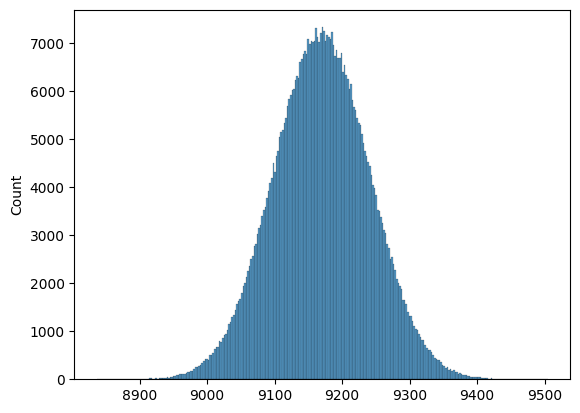

In [189]:
sns.histplot(bootstrapped_18_25_survey)

In [190]:
np.percentile(bootstrapped_18_25_survey, [5,95]) # 90%

array([9052.66102, 9287.10119])

In [191]:
np.percentile(bootstrapped_18_25_survey, [2.5,97.5]) # 95%

array([9030.250825, 9309.80153 ])

In [192]:
np.percentile(bootstrapped_18_25_survey, [0.5,99.5]) #99%

array([8986.577273, 9353.228526])

In [193]:
df_Age_26_35 = df[df["Age"] == "26-35"]["Purchase"]

In [194]:
bootstrapped_26_35_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_26_35, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_26_35_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

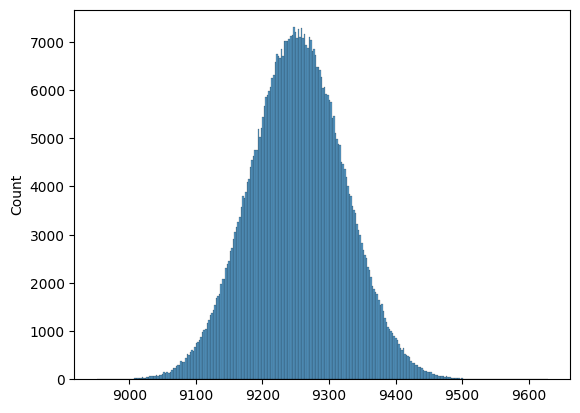

In [195]:
sns.histplot(bootstrapped_26_35_survey)

In [196]:
np.percentile(bootstrapped_26_35_survey, [5,95]) #90%

array([9136.34581, 9369.73296])

In [197]:
np.percentile(bootstrapped_26_35_survey, [2.5,97.5]) #95%

array([9114.04515, 9392.13532])

In [198]:
np.percentile(bootstrapped_26_35_survey, [0.5,99.5]) #99%

array([9071.327685, 9435.157259])

In [199]:
df_Age_36_45 = df[df["Age"] == "36-45"]["Purchase"]

In [200]:
bootstrapped_36_45_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_36_45, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_36_45_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

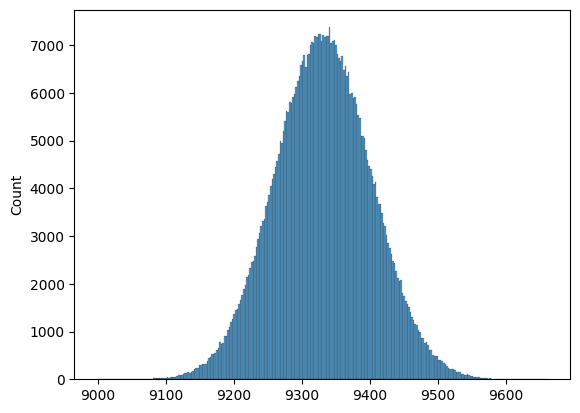

In [201]:
sns.histplot(bootstrapped_36_45_survey)

In [202]:
np.percentile(bootstrapped_36_45_survey, [5,95])#90%

array([9214.91176, 9448.35012])

In [203]:
np.percentile(bootstrapped_36_45_survey, [2.5,97.5]) #95%

array([9192.93908, 9471.05584])

In [204]:
np.percentile(bootstrapped_36_45_survey, [0.5,99.5]) #99%

array([9149.161013, 9514.812117])

In [205]:
df_Age_46_50 = df[df["Age"] == "46-50"]["Purchase"]

In [206]:
bootstrapped_46_50_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_46_50, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_46_50_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

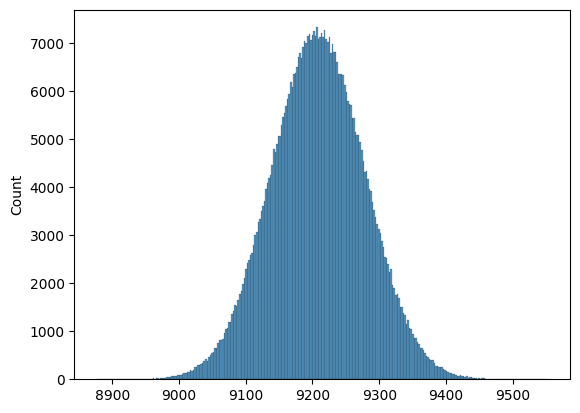

In [207]:
sns.histplot(bootstrapped_46_50_survey)

In [208]:
np.percentile(bootstrapped_46_50_survey, [5,95]) #90%

array([9093.55275, 9324.37931])

In [209]:
np.percentile(bootstrapped_46_50_survey, [2.5,97.5]) #95%

array([9071.405005, 9346.638725])

In [210]:
np.percentile(bootstrapped_46_50_survey, [0.5,99.5]) #99%

array([9027.816871, 9390.305374])

In [211]:
df_Age_51_55 = df[df["Age"] == "51-55"]["Purchase"]

In [212]:
bootstrapped_51_55_survey = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_51_55, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_51_55_survey.append(bootstrapped_mean)

<Axes: ylabel='Count'>

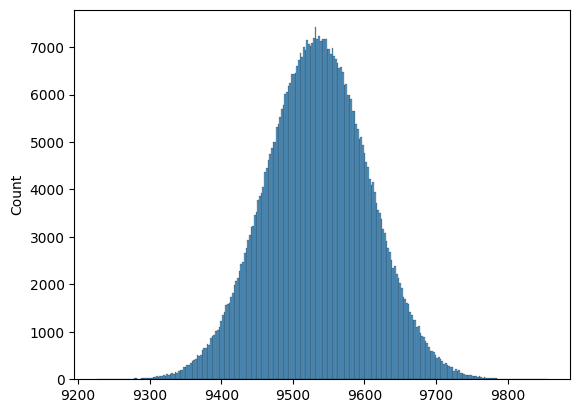

In [217]:
sns.histplot(bootstrapped_51_55_survey)

In [218]:
np.percentile(bootstrapped_51_55_survey, [5,95]) #90%

array([9416.6974, 9652.936 ])

In [219]:
np.percentile(bootstrapped_51_55_survey, [2.5,97.5]) #95%

array([9394.19174 , 9675.439725])

In [220]:
np.percentile(bootstrapped_36_45_survey, [0.5,99.5]) #99%

array([9149.161013, 9514.812117])

In [221]:
df_Age_55plus = df[df["Age"] == "55+"]["Purchase"]

In [222]:
bootstrapped_df_Age_55plus = []
for reps in range(df.shape[0]):
    bootstrapped_samples = np.random.choice(df_Age_55plus, size = 5000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_df_Age_55plus.append(bootstrapped_mean)

<Axes: ylabel='Count'>

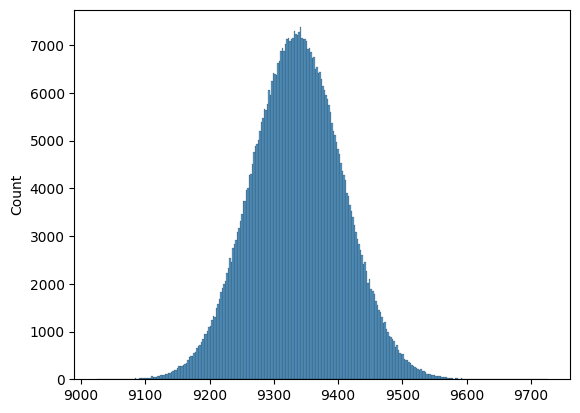

In [213]:
sns.histplot(bootstrapped_df_Age_55plus)

In [223]:
np.percentile(bootstrapped_df_Age_55plus, [5,95]) #90%

array([9220.17168, 9453.02236])

In [224]:
np.percentile(bootstrapped_df_Age_55plus, [2.5,97.5]) #95%

array([9197.965085, 9475.4974  ])

In [225]:
np.percentile(bootstrapped_df_Age_55plus, [0.5,99.5]) #99%

array([9154.624869, 9519.271066])

CLT

In [227]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


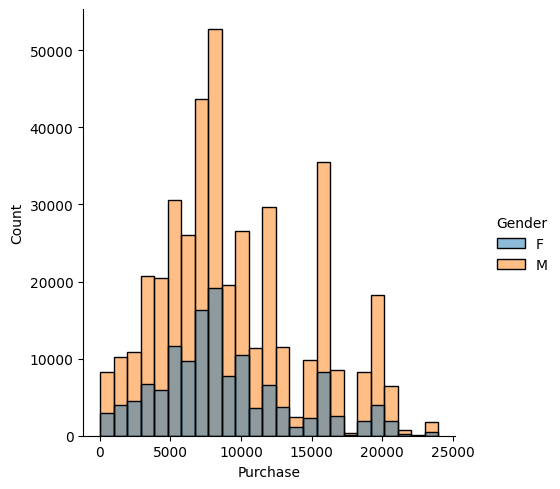

In [228]:
sns.displot( x='Purchase', data=df, hue='Gender', bins=25)

Here we are taking 300 random samples from the data and take its mean. we do this 1000 times.

According to CLT, it should be normally distributed.

Male and female purchase comparison

In [ ]:


sample_size = 300
Iterations = 1000

male_expense_mean = [df[df['Gender'] == 'M']['Purchase'].sample(sample_size).mean() for _ in range(Iterations)]


In [214]:

sample_size = 300
Iterations = 1000

female_expense_mean = [df[df['Gender'] == 'F']['Purchase'].sample(sample_size).mean() for _ in range(Iterations)]



<Axes: ylabel='Density'>

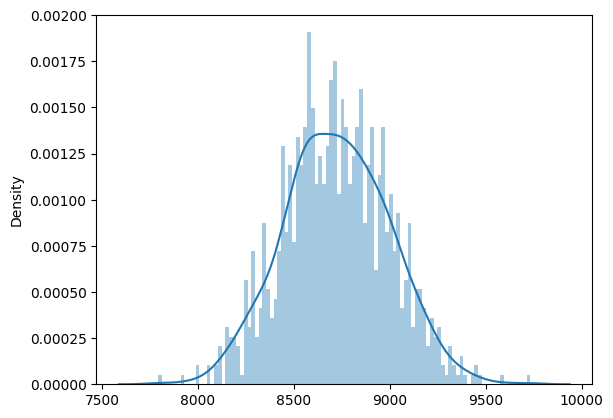

In [215]:
sns.distplot(male_expense_mean,bins=100)

<Axes: ylabel='Density'>

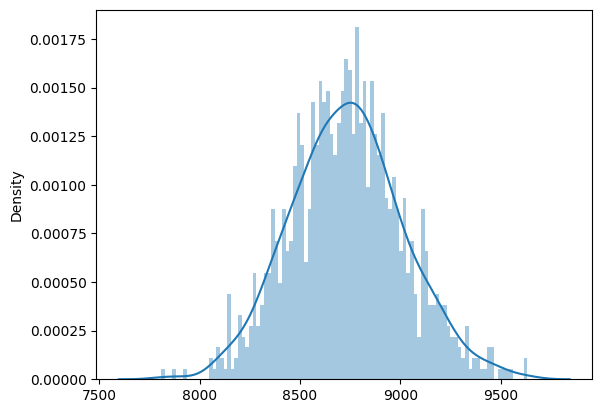

In [216]:
sns.distplot(female_expense_mean,bins=100)

Married and Unmarried purchase comparison

In [229]:
married_expense_mean=[df[df['Marital_Status_category']=='Married']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]

In [230]:
unmarried_expense_mean=[df[df['Marital_Status_category']=='Unmarried']['Purchase'].sample(sample_size).mean() for i in range(Iterations)]

<Axes: ylabel='Density'>

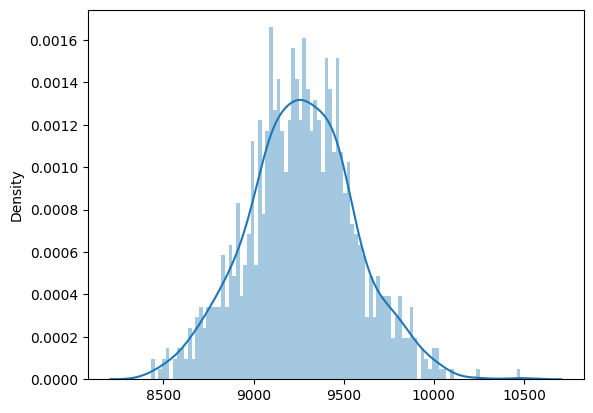

In [231]:
sns.distplot(married_expense_mean,bins=100)

<Axes: ylabel='Density'>

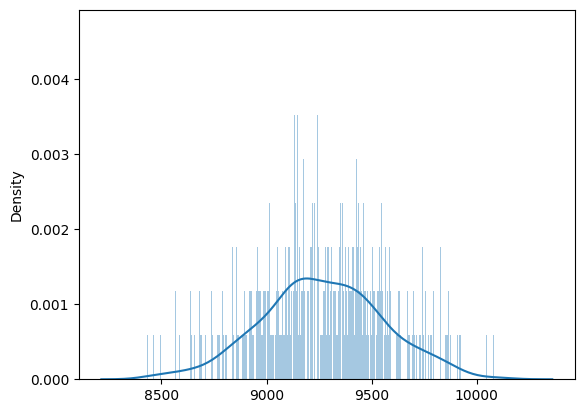

In [232]:
sns.distplot(unmarried_expense_mean,bins=1000)

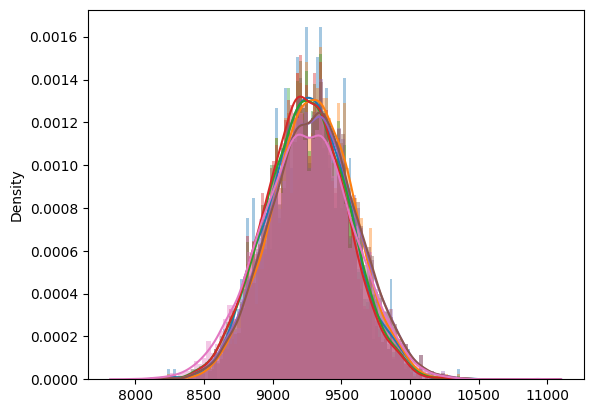

In [233]:
age_group_expense_mean = []
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    age_group_expense_mean.append([df[df['Age']== val ]['Purchase'].sample(sample_size).mean() for i in range(Iterations)])
    sns.distplot(age_group_expense_mean,bins=100)

Based on the analysis, it can be inferred that the purchases across different age categories exhibit a significant overlap. Specifically, the observed data indicates that there is considerable similarity and overlap in the purchasing behavior across various age groups.

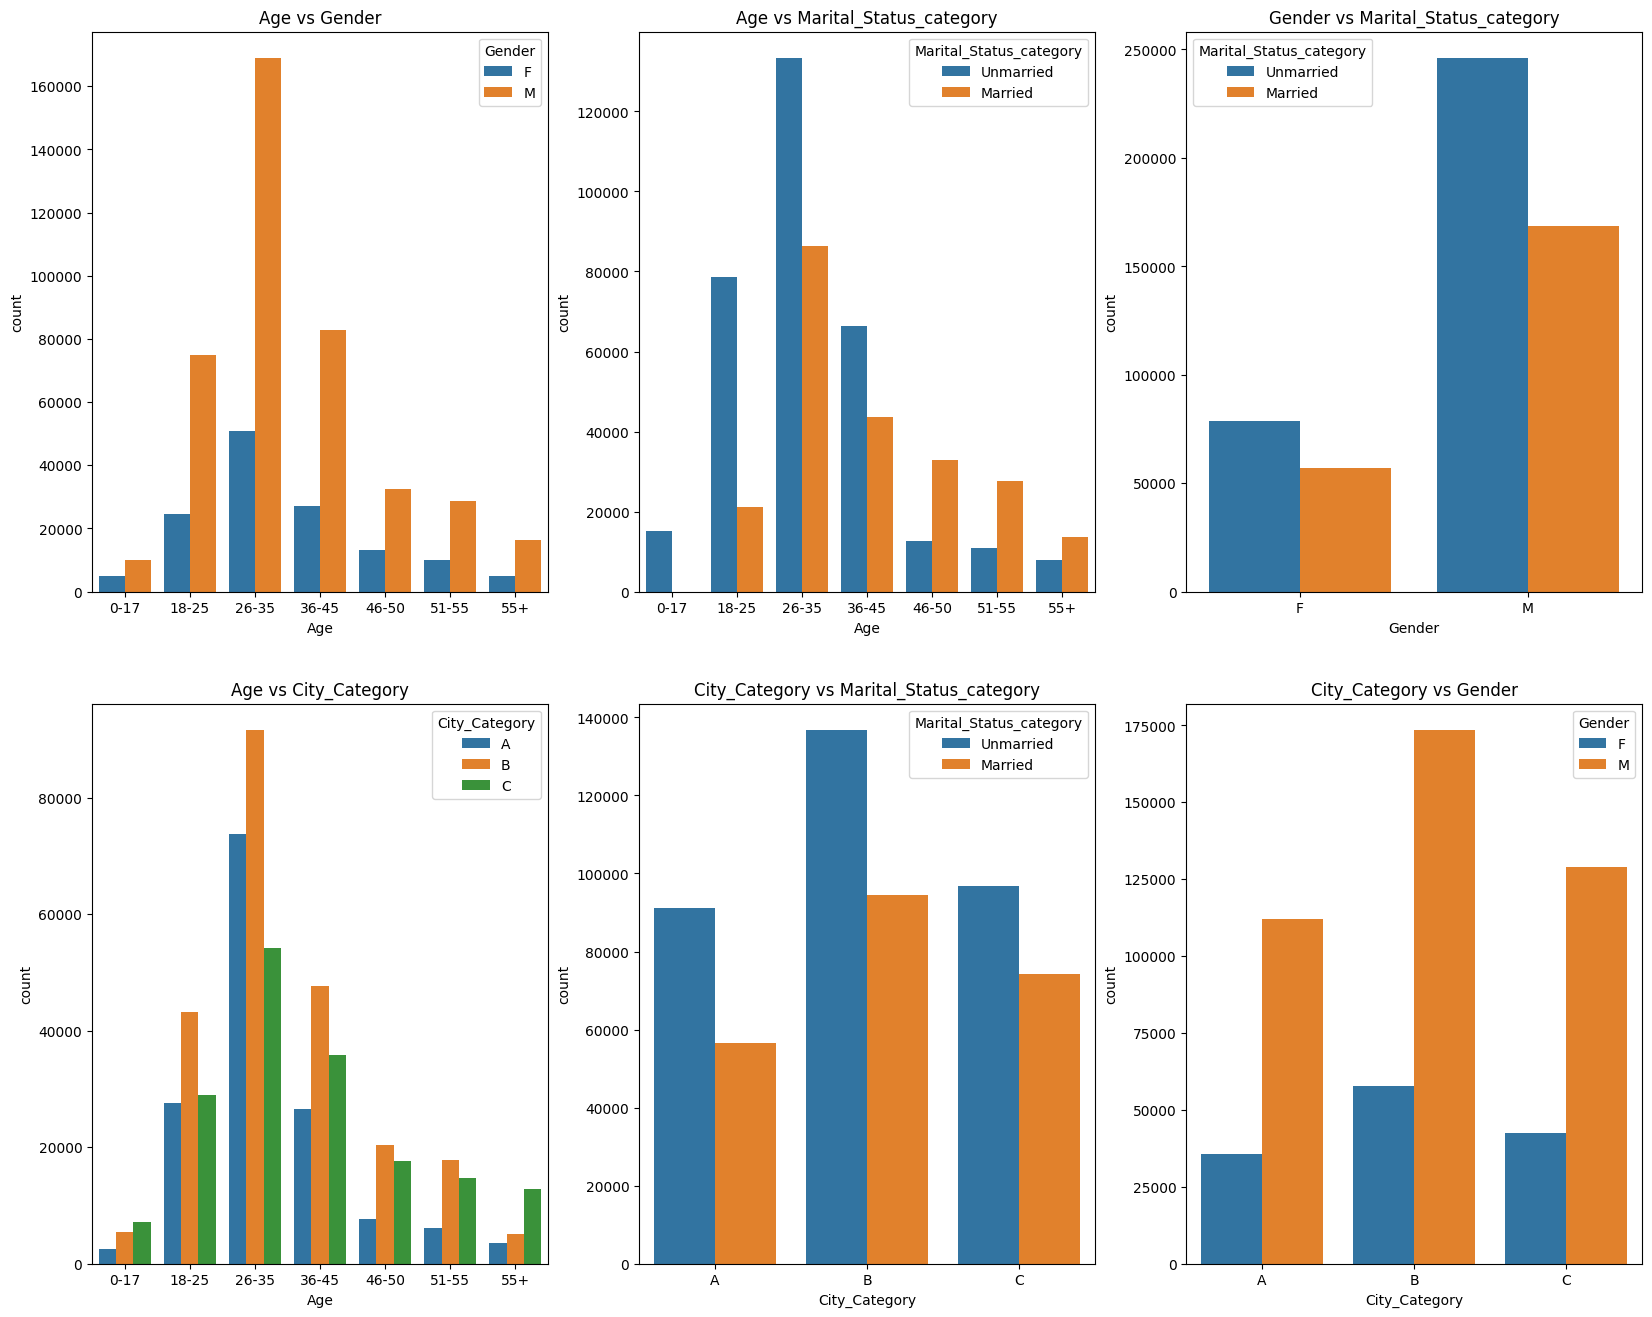

In [234]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (20,16))
sns.countplot(x = "Age", hue ="Gender", data = df, ax=axis[0,0])
sns.countplot(x = "Age", hue ="Marital_Status_category", data = df, ax=axis[0,1])
sns.countplot(x = "Gender", hue ="Marital_Status_category", data = df, ax=axis[0,2])
sns.countplot(x = "Age", hue ="City_Category", data = df, ax=axis[1,0])
sns.countplot(x = "City_Category", hue ="Marital_Status_category", data = df, ax=axis[1,1])
sns.countplot(x = "City_Category", hue ="Gender", data = df, ax=axis[1,2])

axis[0,0].set_title("Age vs Gender")
axis[0,1].set_title("Age vs Marital_Status_category")
axis[0,2].set_title("Gender vs Marital_Status_category")
axis[1,0].set_title("Age vs City_Category")
axis[1,1].set_title("City_Category vs Marital_Status_category")
axis[1,2].set_title("City_Category vs Gender")

plt.show()

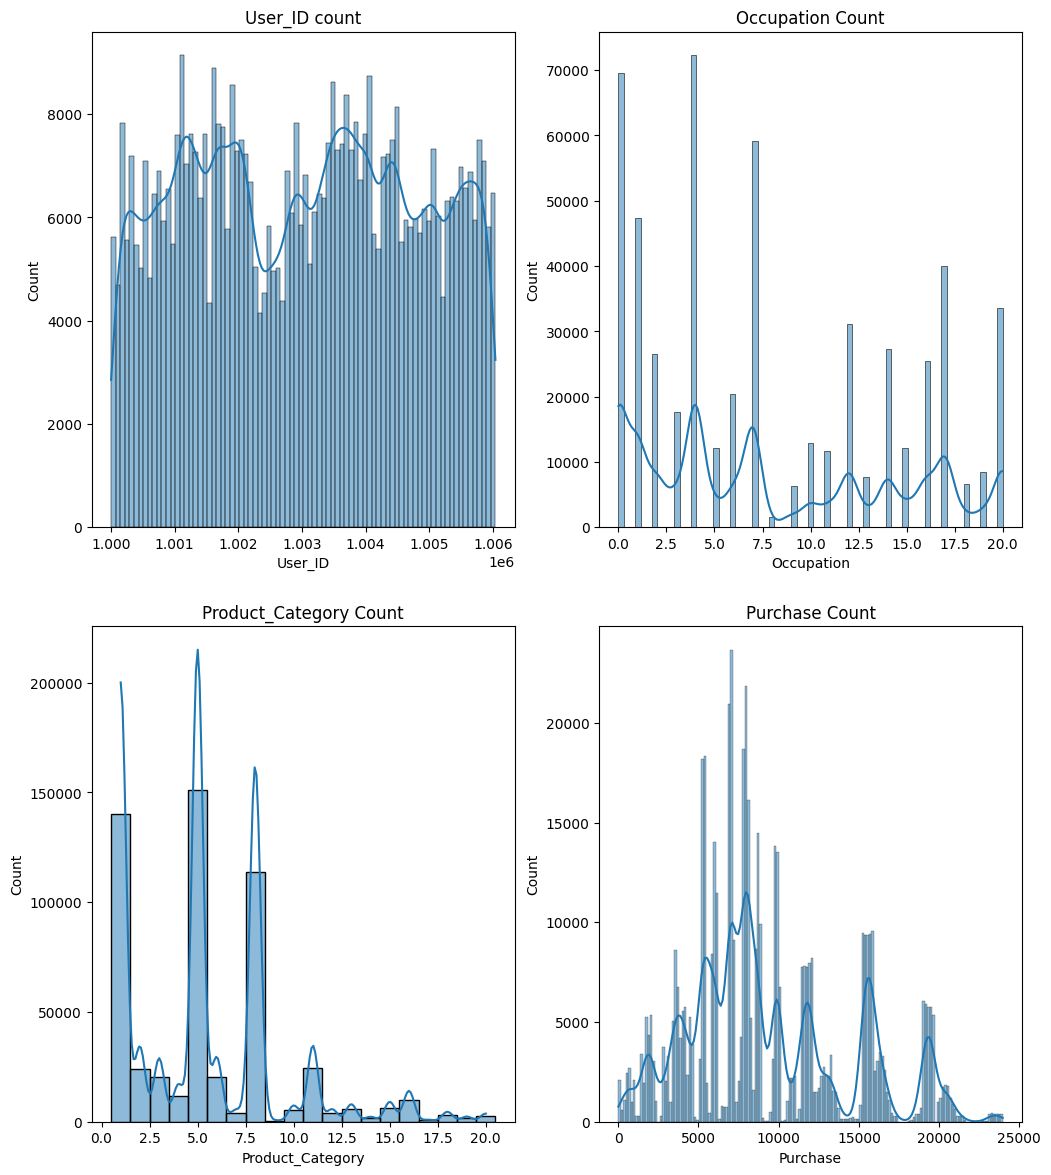

In [235]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="User_ID", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Occupation", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Product_Category", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Purchase", kde=True, ax=axis[1,1])
axis[0,0].set_title("User_ID count")
axis[0,1].set_title("Occupation Count")
axis[1,0].set_title("Product_Category Count")
axis[1,1].set_title("Purchase Count")

plt.show()

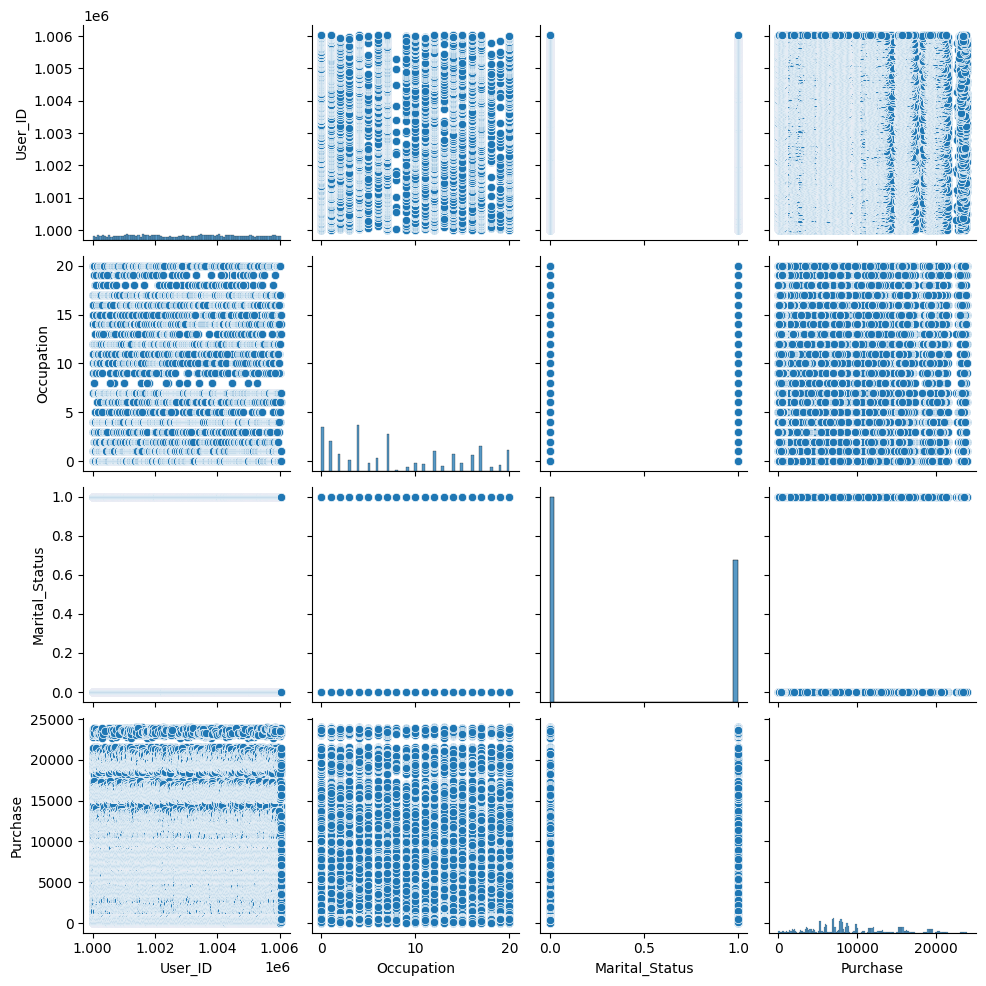

In [236]:
sns.pairplot(df)

In [237]:
df.corr()

,User_ID,Occupation,Marital_Status,Purchase
User_ID,1.000000,-0.023971,0.020443,0.004716
Occupation,-0.023971,1.000000,0.024280,0.020833
Marital_Status,0.020443,0.024280,1.000000,-0.000463
Purchase,0.004716,0.020833,-0.000463,1.000000


<Axes: >

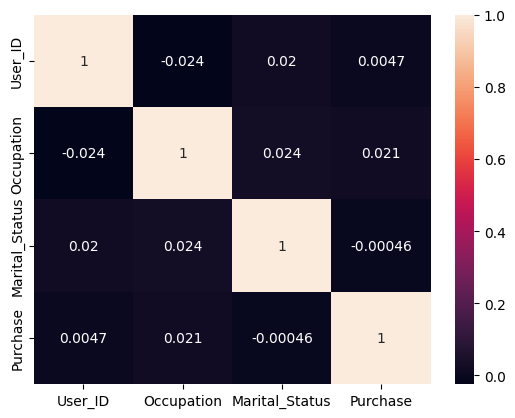

In [238]:
#plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

Performing the same activity for Married vs Unmarried and Age For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

In [239]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


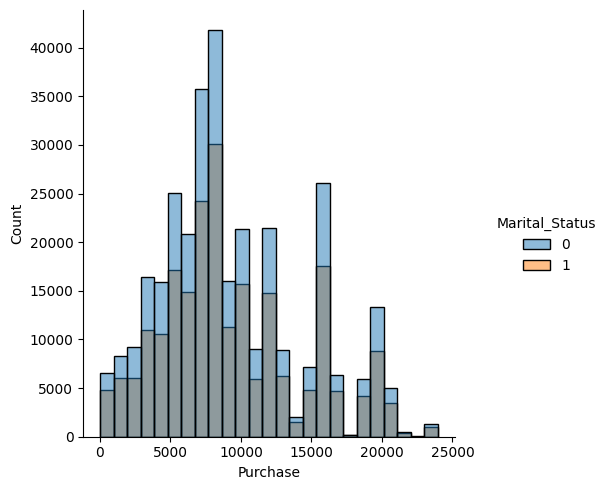

In [240]:
sns.displot( x='Purchase', data=df, hue='Marital_Status', bins=25)

In [241]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [242]:
data = df['Age'].value_counts(normalize=True)*100

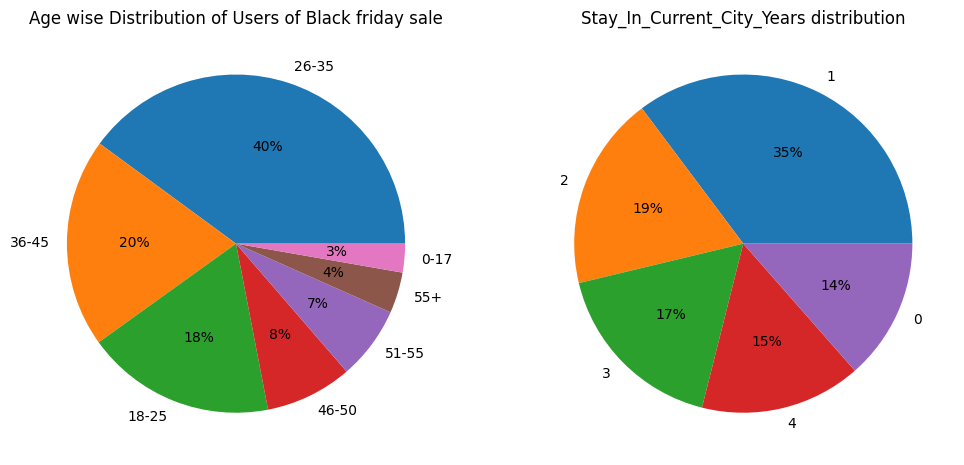

In [243]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
#palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%') # colors=palette_color)
axs[0].set_title("Age wise Distribution of Users of Black friday sale")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
#palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%')# colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years distribution")
plt.show()

# **Insights:**

The majority, approximately 75%, of the population is male, while only around 25% are female.
The most active age group in terms of involvement and participation is the 26-35 age bracket.
Product categories 1, 5, and 8 demonstrate the highest demand among customers.
The largest proportion of users originates from Country B.
When considering the flow of purchase value, the order is as follows: Unmarried males > Married males > Unmarried females > Married females.
Individuals who have resided in a particular city for at least one year engage in more shopping activities compared to other groups.

# **Recommendations:**

In order to increase female participation in the sale, it is recommended to introduce different new items specifically targeted towards them. Creating attractive offers and discounts can also help in attracting more female customers.

To encourage participation from the age groups of 0-17 and 55+, it is advisable to offer a wider range of products that cater to their preferences. Increasing discounts and offers specifically targeting these age categories can help in boosting their engagement. It is important to acknowledge that age plays a crucial role in purchasing power, and addressing the needs of older individuals with appealing products can be a strategic opportunity.

Maintaining a sufficient stock of the most demanded products, such as those falling under categories 1, 5, and 8, is crucial to meet customer demands and ensure customer satisfaction.

Given that the majority of users belong to Country B, it is recommended to maintain adequate stock levels of all the required products in this country to cater to the demand effectively.

To increase women's involvement and overall revenue, more products, offers, and discounts specifically tailored to attract and tempt female customers should be implemented.

Although there is no significant difference in spending patterns between married and unmarried individuals, there are notable differences in product preferences. Targeting those products that appeal to the preferences of married and unmarried individuals can be an effective strategy to enhance their engagement and boost sales.

It is essential to create awareness about the products sold at the supermarket, as there is potential for growth in an unsaturated market. Implementing marketing strategies to increase awareness and reach out to a wider customer base can yield positive results.

The data analysis aligns with the Central Limit Theorem (CLT), where even for sampled data, the mean and median remain approximately the same. This indicates the reliability of the data and supports decision-making based on statistical measures.

By implementing these recommendations, it is anticipated that customer engagement, sales, and overall revenue can be positively influenced, leading to a more successful and prosperous business.**-VRM**





